In [1]:
import numpy as np
from Sarsa import SarsaAgent
from WindyGridworld import WindyGridworldEnv
import matplotlib.pyplot as plt

In [2]:
wind = np.zeros((7, 10))
wind[:, 3:9] += 1
wind[:, 6:8] += 1
wind

array([[0., 0., 0., 1., 1., 1., 2., 2., 1., 0.],
       [0., 0., 0., 1., 1., 1., 2., 2., 1., 0.],
       [0., 0., 0., 1., 1., 1., 2., 2., 1., 0.],
       [0., 0., 0., 1., 1., 1., 2., 2., 1., 0.],
       [0., 0., 0., 1., 1., 1., 2., 2., 1., 0.],
       [0., 0., 0., 1., 1., 1., 2., 2., 1., 0.],
       [0., 0., 0., 1., 1., 1., 2., 2., 1., 0.]])

In [3]:
max_episodes = 250
env = WindyGridworldEnv()
agent = SarsaAgent()
observation = env.reset()
episode = 0
action = agent.move(observation)
stepsPerEpisode = np.empty(max_episodes)
episodeTrajectories = []
steps = 0
trajectory = [(observation)]

while episode < max_episodes:
    observation2, reward, terminated = env.step(action)
    action2 = agent.move(observation2)
    agent.update(observation, action, reward, observation2, action2)
    observation =  observation2
    action = action2
    trajectory.append(observation)

    steps += 1
    if terminated:
        stepsPerEpisode[episode] =  steps
        episodeTrajectories.append(trajectory)

        episode += 1
        if (episode % 15) == 0: print(f"episode {episode} done, steps {steps} were needed")
        steps = 0
        observation = env.reset()
        trajectory = [(observation)]

        action = agent.move(observation)
env.close()

episode 15 done, steps 94 were needed
episode 30 done, steps 168 were needed
episode 45 done, steps 89 were needed
episode 60 done, steps 20 were needed
episode 75 done, steps 53 were needed
episode 90 done, steps 45 were needed
episode 105 done, steps 92 were needed
episode 120 done, steps 29 were needed
episode 135 done, steps 19 were needed
episode 150 done, steps 21 were needed
episode 165 done, steps 26 were needed
episode 180 done, steps 24 were needed
episode 195 done, steps 19 were needed
episode 210 done, steps 23 were needed
episode 225 done, steps 19 were needed
episode 240 done, steps 15 were needed


In [4]:
np.min(stepsPerEpisode)

15.0

In [5]:
np.argmin(stepsPerEpisode)

223

Note: After 5384 steps the optimal policy was found. In some cases it's still larger than 15 because exploring moves are made

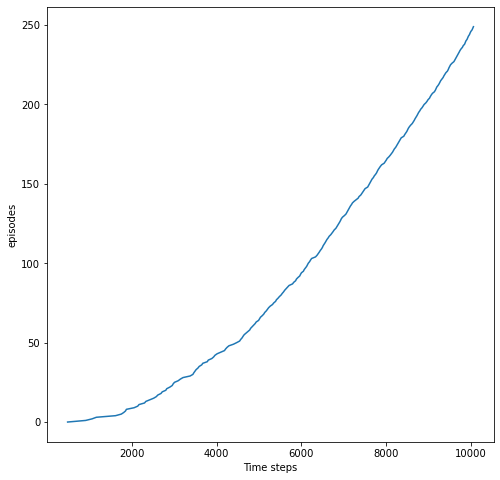

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylabel("episodes")
ax.set_xlabel("Time steps")
ax.plot(np.cumsum(stepsPerEpisode), np.arange(len(stepsPerEpisode)));


In [7]:

def plot_trajectory(episode):
    grid = np.zeros((7, 10))


    for pos in episodeTrajectories[episode]:
        grid[pos] = 0.5

    fig, ax = plt.subplots(figsize=(20, 5))


    for i in range(len(episodeTrajectories[episode]) - 1):
        curr_pos = episodeTrajectories[episode][i]
        next_pos = episodeTrajectories[episode][i + 1]
        delta = (next_pos[1] - curr_pos[1], next_pos[0] - curr_pos[0])
        ax.arrow(curr_pos[1], curr_pos[0], delta[0], delta[1],
             head_width=0.1, head_length=0.1, fc='k', ec='k', linewidth=3)
        
    ax.set_xticks(np.arange(10), env.wind[0,:])
    ax.set_yticks(np.arange(7), np.zeros(7))

    ax.text(0, 3.1, "start", fontsize=30)
    ax.text(6.4, 3.1, "end", fontsize=30)
    ax.set_xlabel("Wind")
    ax.set_ylabel("Wind")
    ax.set_title("Trajectory")
    ax.grid(True)
    plt.show()



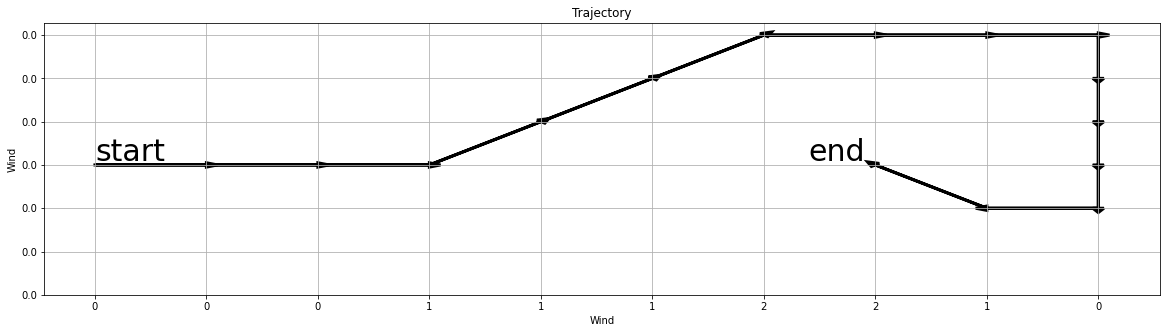

In [8]:
plot_trajectory(np.argmin(stepsPerEpisode))

### With diagonal moves

In [9]:
max_episodes = 250
env = WindyGridworldEnv()
agent = SarsaAgent(actionSpace=8)
observation = env.reset()
episode = 0
action = agent.move(observation)
stepsPerEpisode = np.empty(max_episodes)
episodeTrajectories = []
steps = 0
trajectory = [(observation)]

while episode < max_episodes:
    observation2, reward, terminated = env.step(action)
    action2 = agent.move(observation2)
    agent.update(observation, action, reward, observation2, action2)
    observation =  observation2
    action = action2
    trajectory.append(observation)

    steps += 1
    if terminated:
        stepsPerEpisode[episode] =  steps
        episodeTrajectories.append(trajectory)

        episode += 1
        if (episode % 15) == 0: print(f"episode {episode} done, steps {steps} were needed")
        steps = 0
        observation = env.reset()
        trajectory = [(observation)]

        action = agent.move(observation)
env.close()

episode 15 done, steps 52 were needed
episode 30 done, steps 24 were needed
episode 45 done, steps 63 were needed
episode 60 done, steps 11 were needed
episode 75 done, steps 21 were needed
episode 90 done, steps 40 were needed
episode 105 done, steps 17 were needed
episode 120 done, steps 7 were needed
episode 135 done, steps 7 were needed
episode 150 done, steps 20 were needed
episode 165 done, steps 11 were needed
episode 180 done, steps 10 were needed
episode 195 done, steps 8 were needed
episode 210 done, steps 7 were needed
episode 225 done, steps 7 were needed
episode 240 done, steps 9 were needed


In [10]:
np.min(stepsPerEpisode)

7.0

In [11]:
np.argmin(stepsPerEpisode)

60

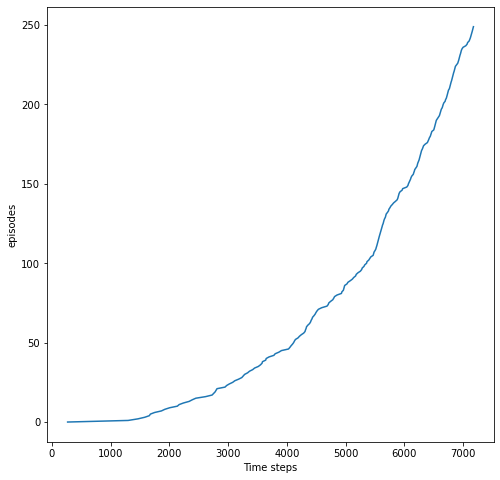

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylabel("episodes")
ax.set_xlabel("Time steps")
ax.plot(np.cumsum(stepsPerEpisode), np.arange(len(stepsPerEpisode)));


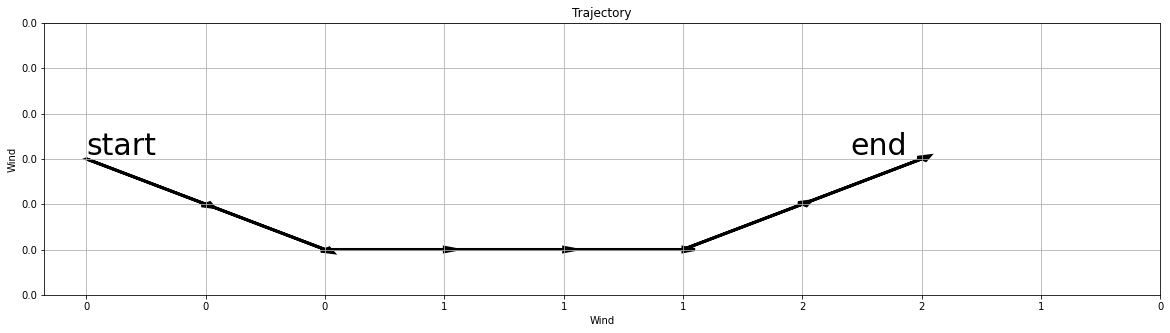

In [13]:
plot_trajectory(np.argmin(stepsPerEpisode))

### With no move option

In [14]:
max_episodes = 250
env = WindyGridworldEnv()
agent = SarsaAgent(actionSpace=9)
observation = env.reset()
episode = 0
action = agent.move(observation)
stepsPerEpisode = np.empty(max_episodes)
episodeTrajectories = []
steps = 0
trajectory = [(observation)]

while episode < max_episodes:
    observation2, reward, terminated = env.step(action)
    action2 = agent.move(observation2)
    agent.update(observation, action, reward, observation2, action2)
    observation =  observation2
    action = action2
    trajectory.append(observation)

    steps += 1
    if terminated:
        stepsPerEpisode[episode] =  steps
        episodeTrajectories.append(trajectory)

        episode += 1
        if (episode % 15) == 0: print(f"episode {episode} done, steps {steps} were needed")
        steps = 0
        observation = env.reset()
        trajectory = [(observation)]

        action = agent.move(observation)
env.close()

episode 15 done, steps 66 were needed
episode 30 done, steps 22 were needed
episode 45 done, steps 165 were needed
episode 60 done, steps 115 were needed
episode 75 done, steps 16 were needed
episode 90 done, steps 12 were needed
episode 105 done, steps 27 were needed
episode 120 done, steps 18 were needed
episode 135 done, steps 38 were needed
episode 150 done, steps 18 were needed
episode 165 done, steps 7 were needed
episode 180 done, steps 10 were needed
episode 195 done, steps 7 were needed
episode 210 done, steps 8 were needed
episode 225 done, steps 10 were needed
episode 240 done, steps 7 were needed


In [15]:
np.min(stepsPerEpisode)

7.0

In [16]:
np.argmin(stepsPerEpisode)

70

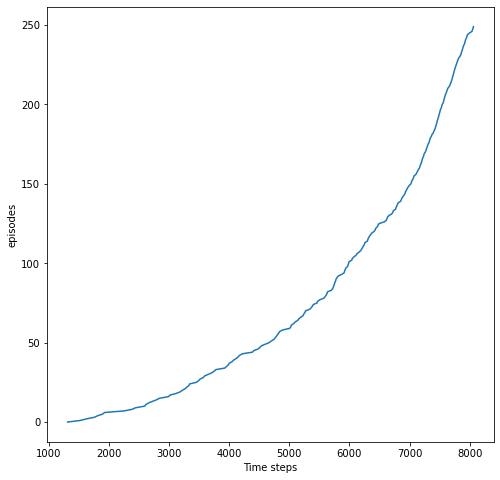

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylabel("episodes")
ax.set_xlabel("Time steps")
ax.plot(np.cumsum(stepsPerEpisode), np.arange(len(stepsPerEpisode)));


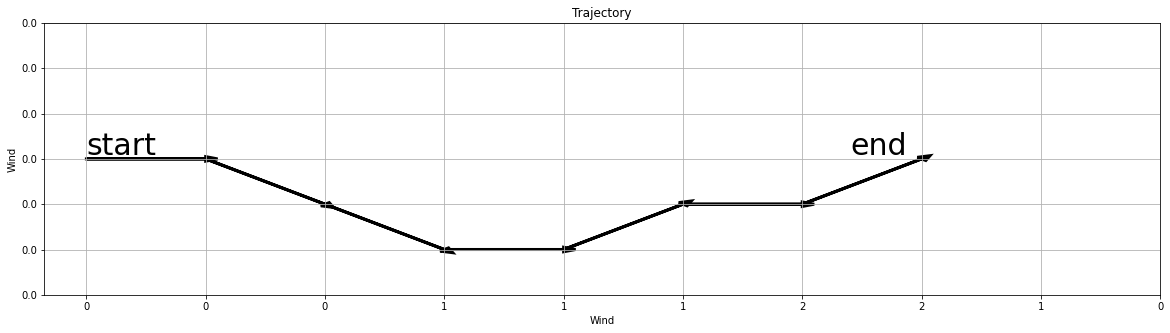

In [18]:
plot_trajectory(np.argmin(stepsPerEpisode))

### Stochastic

In [19]:
max_episodes = 500
env = WindyGridworldEnv(stochastic=True)
agent = SarsaAgent(actionSpace=9)
observation = env.reset()
episode = 0
action = agent.move(observation)
stepsPerEpisode = np.empty(max_episodes)
episodeTrajectories = []
steps = 0
trajectory = [(observation)]

while episode < max_episodes:
    observation2, reward, terminated = env.step(action)
    action2 = agent.move(observation2)
    agent.update(observation, action, reward, observation2, action2)
    observation =  observation2
    action = action2
    trajectory.append(observation)

    steps += 1
    if terminated:
        stepsPerEpisode[episode] =  steps
        episodeTrajectories.append(trajectory)

        episode += 1
        if (episode % 15) == 0: print(f"episode {episode} done, steps {steps} were needed")
        steps = 0
        observation = env.reset()
        trajectory = [(observation)]

        action = agent.move(observation)
env.close()

episode 15 done, steps 180 were needed
episode 30 done, steps 341 were needed
episode 45 done, steps 84 were needed
episode 60 done, steps 75 were needed
episode 75 done, steps 30 were needed
episode 90 done, steps 22 were needed
episode 105 done, steps 33 were needed
episode 120 done, steps 149 were needed
episode 135 done, steps 33 were needed
episode 150 done, steps 109 were needed
episode 165 done, steps 58 were needed
episode 180 done, steps 77 were needed
episode 195 done, steps 9 were needed
episode 210 done, steps 132 were needed
episode 225 done, steps 63 were needed
episode 240 done, steps 32 were needed
episode 255 done, steps 99 were needed
episode 270 done, steps 63 were needed
episode 285 done, steps 108 were needed
episode 300 done, steps 13 were needed
episode 315 done, steps 21 were needed
episode 330 done, steps 66 were needed
episode 345 done, steps 16 were needed
episode 360 done, steps 57 were needed
episode 375 done, steps 197 were needed
episode 390 done, steps 5

In [20]:
np.min(stepsPerEpisode)

7.0

In [21]:
np.argmin(stepsPerEpisode)

207

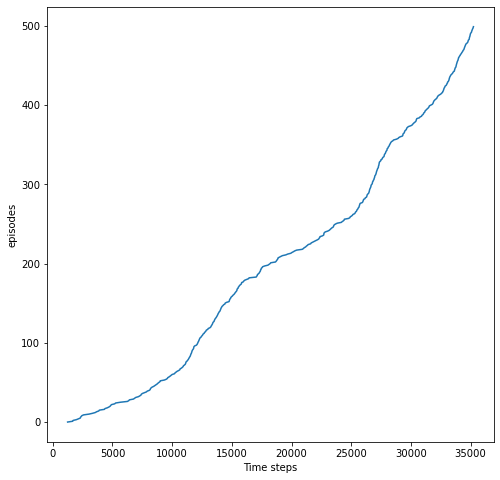

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylabel("episodes")
ax.set_xlabel("Time steps")
ax.plot(np.cumsum(stepsPerEpisode), np.arange(len(stepsPerEpisode)));


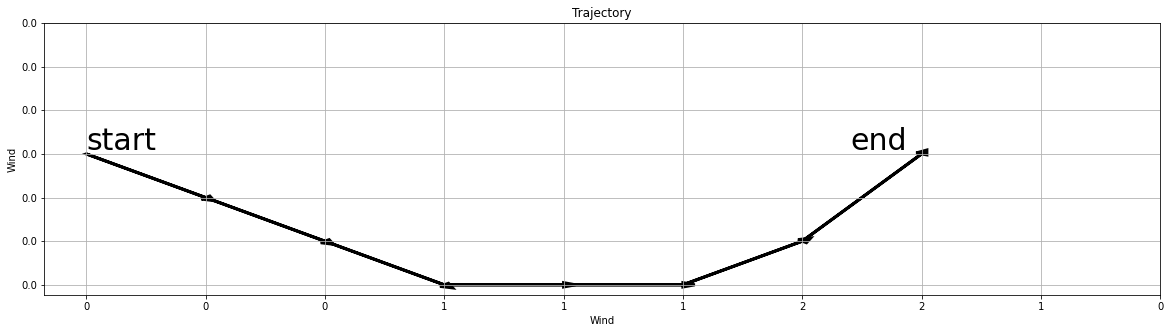

In [23]:
plot_trajectory(np.argmin(stepsPerEpisode))